# Pratybos

<code>**1-2 : Perceptronas (numpy)**</code><br>
<code>**3-4 : Neuroninis tinklas (PyTorch)**</code><br>

### Perceptronas (numpy)

Šiame uždavinyje reikės sukurti perceptroną kuris gebėtų optimizuoti modelio parametrus taip kad išspręstu XOR problemą.
Sukurkite generinę klasę <code>**class NN**</code> kurią vėliau taip pat  panaudosite uždavinyje `#2`. Žemiau grafiko illiustracijos rasite šios klasės struktūra kurioje yra šie metodai:

- forward (skaičiavimas pirmyn)
- backward (skaičiavimas argal)
- fit (mokymasis)
- accuracy (tikslumo matavimas)
- plot (grafikus kuriantis metodas)

## #1

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X = np.array([
    [0, 0], 
    [0, 1], 
    [1, 0], 
    [1, 1]
])
y = np.array([
    [0],   
    [1],   
    [1],   
    [0]
])

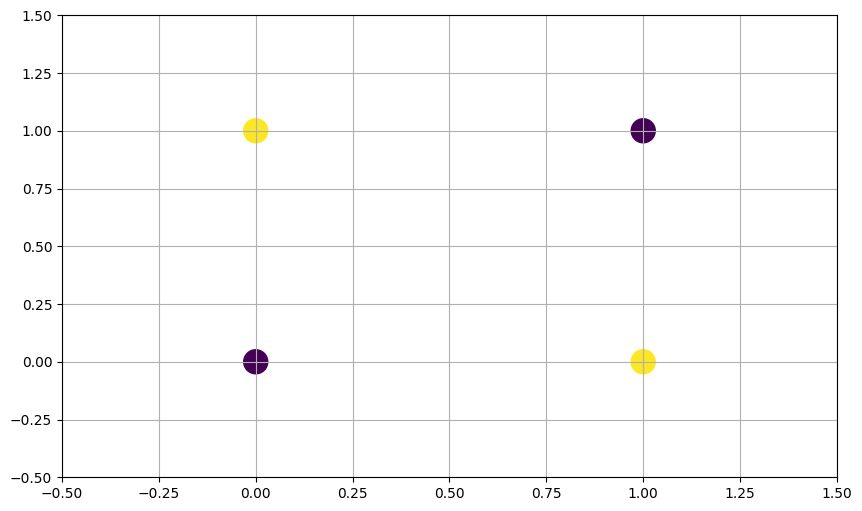

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, s=300)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid(True)

Galutinis XOR modelio tikslumas gaunamas:
Kai y=[0], spėjimas=[0.0031756], tikslumas [99.68243984]%
Kai y=[0], spėjimas=[0.01001593], tikslumas [98.99840669]%
Kai y=[1], spėjimas=[0.99167311], tikslumas [99.16731101]%
Kai y=[1], spėjimas=[0.99176203], tikslumas [99.17620282]%
Vidutinis tikslumas = [99.25609009]%
Pastaba: modelis negarantuoja visada teisingo rezultato.


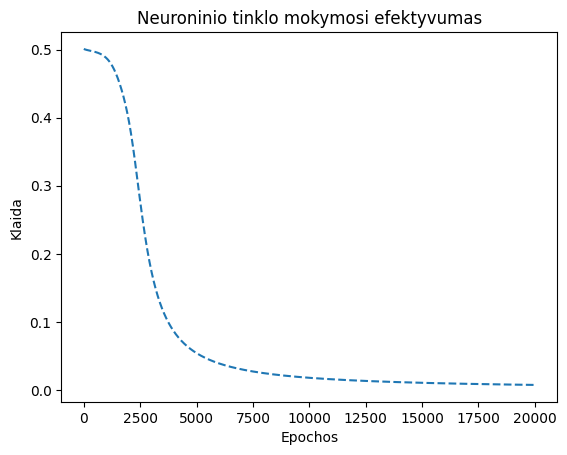

In [5]:
#TODO: Jūsų programa prasideda nuo čia

class NN():
    def __init__(self, architecture:tuple):
        _input, _hidden, _output = architecture
        self.w1 = np.random.normal(0, 1, (_hidden, _input))
        self.w2 = np.random.normal(0, 1, (_output, _hidden))
        self.b1 = np.random.random((_hidden, 1))
        self.b2 = np.random.random((_output, 1))
    
    def sigmoid(self, z, d=False):
        if d: return z * (1 - z)
        return 1 / (1 + np.exp(-z))

    def forward(self, x, w1, w2, b1, b2):
        z1 = (w1 @ x.T + b1).T
        a1 = self.sigmoid(z1)
        z2 = (w2 @ a1.T + b2).T
        a2 = self.sigmoid(z2)
        return z1, a1, z2, a2        
    
    def backward(self, z1, a1, z2, a2, y):
        dz2 = a2 - y
        dw2 = dz2.T @ a1
        db2 = np.sum(dz2, axis=0)
        dz1 = dz2 @ self.w2 * self.sigmoid(a1, d=True)
        dw1 = dz1.T @ X
        db1 = np.sum(dz1)
        return dw1, db1, dw2, db2, dz2
    
    def fit(self, X, y, alpha, epochs):
        m, n = X.shape
        cost = np.zeros((epochs, 1))     
        for e in range(epochs):
            z1, a1, z2, a2 = self.forward(X, self.w1, self.w2, self.b1, self.b2)
            dw1, db1, dw2, db2, dz2 = self.backward(z1, a1, z2, a2, y)            
            self.w1 -= alpha * dw1/m
            self.b1 -= alpha * db1/m
            self.w2 -= alpha * dw2/m
            self.b2 -= alpha * db2/m            
            cost[e] = np.mean(np.abs(dz2)) #Mokymosi istorija                
        return cost
    
    def accuracy(self):
        #Tiesiog palyginamas vienas XOR ir jo apskaičiavimo efektyvumas:
        X_test = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
        y_test = np.array([[0],[1],[1],[0]])     
        #Pasiimame rezultatą, su paskutiniais svoriais:
        z1, a1, z2, a2 = self.forward(X_test, self.w1, self.w2, self.b1, self.b2)
        print('Galutinis XOR modelio tikslumas gaunamas:')       
        final_acc=0
        for ii in range(len(a2)):
            print(f'Kai y={y_test[ii-1]}, spėjimas={a2[ii-1]}, tikslumas {100-(100*abs(a2[ii-1]-y_test[ii-1]))}%')   
            final_acc+=100-(100*abs(a2[ii-1]-y_test[ii-1]))
        print(f'Vidutinis tikslumas = {final_acc/4}%')
        print('Pastaba: modelis negarantuoja visada teisingo rezultato.')
    
    def plot(self, X, y, epochs, cost_istorija):          
        plt.title('Neuroninio tinklo mokymosi efektyvumas');
        plt.ylabel('Klaida')
        plt.xlabel('Epochos')
        plt.plot(cost_istorija, linestyle='--')

#Inicijuojamas modelis:
xor = NN((2,3,1)) # Padidinau paslėpto neuronų sluoksnio dydį iki 3, nes geresni rezultatai

#Atliekamas mokymas ir gaunama klaidu istorija:
epochs=20000
error_istorija = xor.fit( X, y, 0.1, epochs)

#Nubraizoma kaip modeliui sekasi:
xor.plot( X, y, epochs, error_istorija)

#Paskaiciuojamas modelio galutinis tikslumas:
xor.accuracy()   

## #2

Pernaudokite savo perceptrono klasę išspręsti XOR problemą su didesniu duomenų rinkinių iš `xor_data_II.csv` failo.<br>

In [6]:
data = pd.read_csv('../data_samples/xor_data_II.csv')

In [7]:
data.columns

Index(['x1', 'x2', 'y'], dtype='object')

In [8]:
X = data[['x1', 'x2']].values
y = data['y'].values

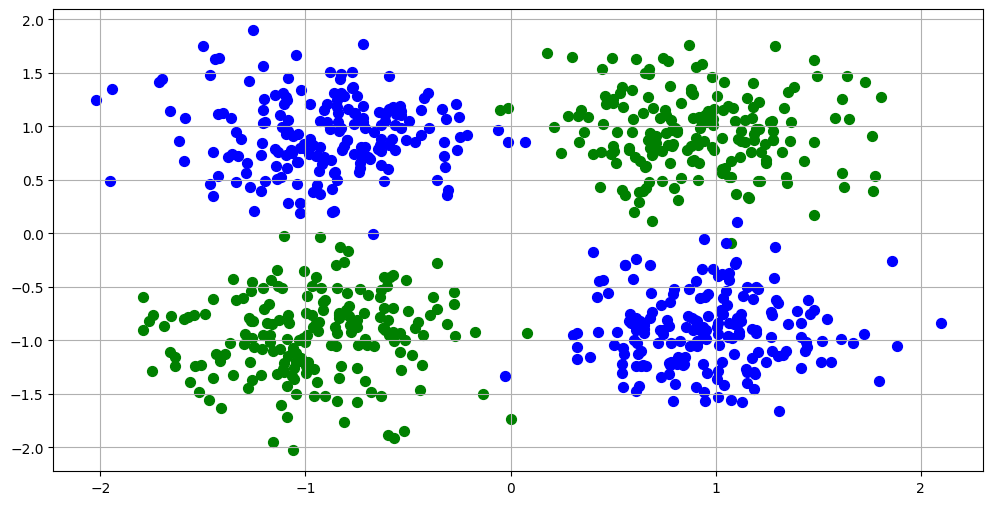

In [9]:
plt.figure(figsize=(12,6))
plt.scatter(*X[y==0].T, c='g', s=50)
plt.scatter(*X[y==1].T, c='b',s=50)
plt.grid(True)

Galutinis XOR modelio tikslumas gaunamas:
Kai y=[0], spėjimas=[0.00066519], tikslumas [99.93348107]%
Kai y=[0], spėjimas=[0.03194593], tikslumas [96.80540666]%
Kai y=[1], spėjimas=[0.69796039], tikslumas [69.79603853]%
Kai y=[1], spėjimas=[0.81678444], tikslumas [81.67844384]%
Vidutinis tikslumas = [87.05334252]%
Pastaba: modelis negarantuoja visada teisingo rezultato.


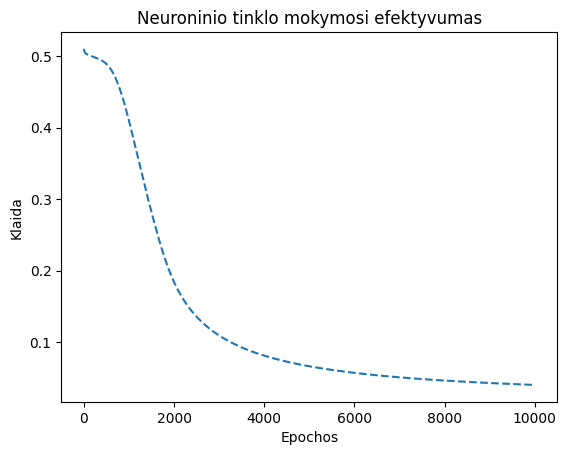

In [10]:
#TODO: Jūsų programa prasideda nuo čia

#Inicijuojamas modelis:
xor = NN((2,3,1)) # Padidinau paslėpto neuronų sluoksnio dydį iki 3, nes geresni rezultatai

#Atliekamas mokymas ir gaunama klaidu istorija:
epochs=10000
error_istorija = xor.fit( X, y.reshape(-1,1), 0.1, epochs)

#Nubraizoma kaip modeliui sekasi:
xor.plot( X, y.reshape(-1,1), epochs, error_istorija)

#Paskaiciuojamas modelio galutinis tikslumas:
xor.accuracy()

### Neuroninis tinklas (PyTorch)

## #3

Atlikite tą patį uždavinį (sukurti perceptrono generinę klasę kuri gali išspręsti XOR problemą) taikydami `PyTorch` biblioteką.

epoch: 001...1000 | cost: 0.7038
epoch: 101...1000 | cost: 0.6889
epoch: 201...1000 | cost: 0.6834
epoch: 301...1000 | cost: 0.6763
epoch: 401...1000 | cost: 0.6657
epoch: 501...1000 | cost: 0.6488
epoch: 601...1000 | cost: 0.6207
epoch: 701...1000 | cost: 0.5763
epoch: 801...1000 | cost: 0.5130
epoch: 901...1000 | cost: 0.4359
Treniravimo trukmė:0.04 min


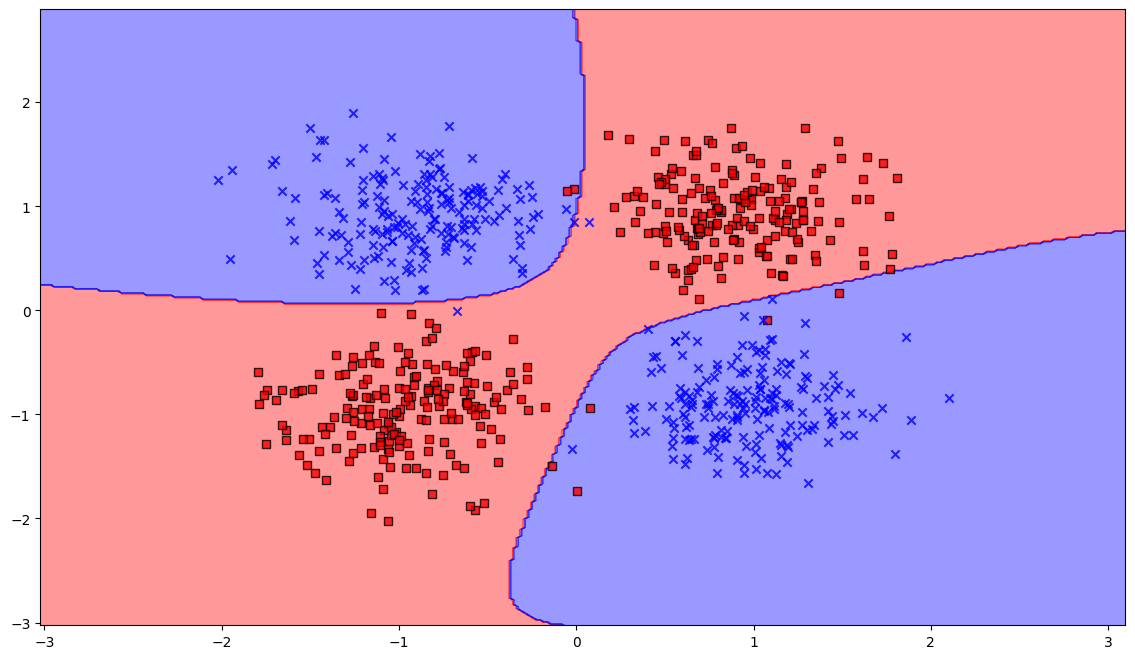

In [11]:
#TODO: Jūsų programa prasideda nuo čia

import time
import torch
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

DEVICE     = 'cpu'
NUM_EPOCHS = 1000

class NN_torch(torch.nn.Module):
    def __init__(self, num_features, num_hidden_1, num_classes):
        super(NN_torch, self).__init__()        
        self.num_classes = num_classes        
        #(svorių matricos, viena tarp įvesties ir kita išvesties)
        self.linear_1   = torch.nn.Linear(num_features, num_hidden_1)
        self.linear_out = torch.nn.Linear(num_hidden_1, num_classes)    
        
    def forward(self, x):        
        #Dėl per mažo dydžio net nereikia aktyvacijos, naudojama tapatybės funkcija:
        out = self.linear_1(x)
        out = F.sigmoid(out)
        #out = F.relu(out)        
        logits = self.linear_out(out)
        probas = F.softmax(logits, dim=1)
        return logits, probas
    
    def backward(self, lr):
        return torch.optim.SGD(self.parameters(), lr=0.1)
    
    def fit(self, X, y, lr):
        #optimizer = torch.optim.SGD(self.parameters(), lr=0.1)
        optimizer = self.backward(lr=0.1)
        start_time     = time.time()
        minibatch_cost = []

        #Paverciama i tensoriu
        features = torch.tensor(X, dtype=torch.float).to(DEVICE)
        targets  = torch.tensor(y, dtype=torch.long).to(DEVICE)

        for epoch in range(NUM_EPOCHS):
            logits, probas = model(features)
            cost           = F.cross_entropy(logits, targets)
            optimizer.zero_grad()
            cost.backward()
            minibatch_cost.append(cost)
            optimizer.step()
            if (epoch % 100 == 0): #Rodom kas 100
                print (f'epoch: {epoch+1:03d}...{NUM_EPOCHS:03d} | cost: {cost:.4f}')
        print(f'Treniravimo trukmė:{((time.time() - start_time)/60):.2f} min')
        
    def plot(self, X, y, resolution=0.02):
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        # plot the decision surface
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution))
        tensor = torch.tensor(np.array([xx1.ravel(), xx2.ravel()]).T).float()
        logits, probas = self.forward(tensor)
        Z = np.argmax(probas.detach().numpy(), axis=1)
        Z = Z.reshape(xx1.shape)

        plt.figure(figsize=(14,8))
        plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        # plot class samples
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                        alpha=0.8, color=cmap(idx),
                        edgecolor='black',
                        marker=markers[idx], 
                        label=cl)

model = NN_torch(num_features=2, num_hidden_1=50, num_classes=2)
model = model.to(DEVICE)

model.fit(X, y, lr=0.1)
model.plot(X, y)

## #4

Pritaikykite savo neurininio tinklo modelį spręsti `mnist` klasifiakcijos problemą. Duomenys rasite 
`data_samples/mnist` kataloge

Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])
Epoch: 001/300 | Batch 000/008 | Cost: 2.3995
Epoch: 001/300  kaina: 2.5134
epochos laikas: 0.03 min
Epoch: 002/300 | Batch 000/008 | Cost: 2.1337
Epoch: 002/300  kaina: 2.4024
epochos laikas: 0.03 min
Epoch: 003/300 | Batch 000/008 | Cost: 2.0644
Epoch: 003/300  kaina: 2.2985
epochos laikas: 0.04 min
Epoch: 004/300 | Batch 000/008 | Cost: 2.0645
Epoch: 004/300  kaina: 2.1975
epochos laikas: 0.04 min
Epoch: 005/300 | Batch 000/008 | Cost: 1.9720
Epoch: 005/300  kaina: 2.0874
epochos laikas: 0.05 min
Epoch: 006/300 | Batch 000/008 | Cost: 1.7827
Epoch: 006/300  kaina: 2.0111
epochos laikas: 0.05 min
Epoch: 007/300 | Batch 000/008 | Cost: 1.7760
Epoch: 007/300  kaina: 1.9015
epochos laikas: 0.06 min
Epoch: 008/300 | Batch 000/008 | Cost: 1.6702
Epoch: 008/300  kaina: 1.8053
epochos laikas: 0.07 min
Epoch: 009/300 | Batch 000/008 | Cost: 1.5639
Epoch: 009/300  kaina: 1.7235
epochos laikas: 0.07 mi

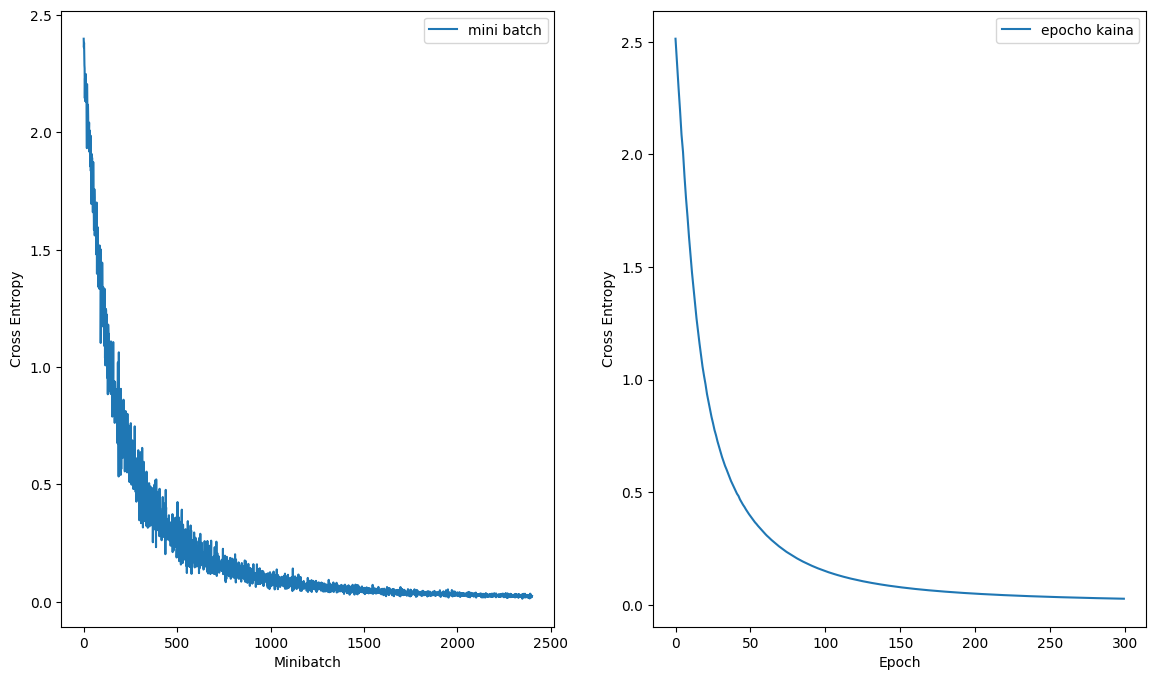

In [13]:
#TODO: Jūsų programa prasideda nuo čia

#Turbūt dalį importų galima suoptimizuoti
import os
import time
import torch
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

BATCH_SIZE = 100
NUM_EPOCHS = 300
DEVICE     = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
DATADIR = f'../data_samples/mnist'

#TESTAMS:
def testImage(image_path):
    im = Image.open(image_path)
    plt.imshow(im, cmap='binary');
    print('Masyvo matmenys', im_array.shape)
    print(np.array(im))
#Norint pratestuoti paveikslelius:
#testImage(f'{DATADIR}/mnist_train/1.png')

class DuomenuKrautuvas(Dataset):
    def __init__(self, csv_path, img_dir, transform=None):    
        df = pd.read_csv(csv_path)
        self.img_dir = img_dir
        self.img_names = df['File Name']
        self.y = df['Class Label']
        self.transform = transform

    def __getitem__(self, index):
        img = Image.open(os.path.join(self.img_dir, self.img_names[index]))
        
        if self.transform is not None:
            img = self.transform(img)
        
        label = self.y[index]
        return img, label

    def __len__(self):
        return self.y.shape[0]

totensor      = transforms.Compose([transforms.ToTensor()])

train_dataset = DuomenuKrautuvas(csv_path=f'{DATADIR}/mnist_train.csv',img_dir=f'{DATADIR}/mnist_train/', transform=totensor)
train_loader  = DataLoader(dataset=train_dataset, batch_size=32, drop_last=True, shuffle=True, num_workers=0) 

valid_dataset = DuomenuKrautuvas(csv_path=f'{DATADIR}/mnist_valid.csv',img_dir=f'{DATADIR}/mnist_valid/',transform=totensor)
valid_loader  = DataLoader(dataset=valid_dataset, batch_size=100, shuffle=False, num_workers=0)

test_dataset  = DuomenuKrautuvas(csv_path=f'{DATADIR}/mnist_test.csv', img_dir=f'{DATADIR}/mnist_test/', transform=totensor)
test_loader   = DataLoader(dataset=test_dataset, batch_size=100, shuffle=False, num_workers=0)
    
#train_dataset = datasets.MNIST(root='data',train=True,transform=transforms.ToTensor(),download=True)
#test_dataset = datasets.MNIST(root='data',train=False,transform=transforms.ToTensor())
#train_loader = DataLoader(dataset=train_dataset,batch_size=BATCH_SIZE,shuffle=True)
#test_loader = DataLoader(dataset=test_dataset,batch_size=BATCH_SIZE,shuffle=False)
    
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break
    
minibatch_cost = []
epoch_cost = []
    
class MLP(torch.nn.Module):    

    def __init__(self, num_features, num_hidden, num_classes):
        super().__init__()
        
        self.num_classes = num_classes
        
        self.linear_1 = torch.nn.Linear(num_features, num_hidden)
        self.linear_1.weight.detach().normal_(0.0, 0.1)
        self.linear_1.bias.detach().zero_()

        self.linear_out = torch.nn.Linear(num_hidden, num_classes)
        self.linear_out.weight.detach().normal_(0.0, 0.1)
        self.linear_out.bias.detach().zero_()    
   
    def forward(self, x):
        out = self.linear_1(x)
        out = torch.sigmoid(out)
        logits = self.linear_out(out)
        #probas = torch.softmax(logits, dim=1)
        return logits #, probas
    
    def compute_loss(self, data_loader):
        curr_loss = 0.
        with torch.no_grad():
            for cnt, (features, targets) in enumerate(data_loader):
                features = features.view(-1, 28*28).to(DEVICE)
                targets = targets.to(DEVICE)
                logits = self(features)
                loss = F.cross_entropy(logits, targets)
                curr_loss += loss
            return float(curr_loss)/cnt    
    
    def fit(self, train_loader, lr=0.1):
        optimizer = torch.optim.SGD(self.parameters(), lr=0.1)
        start_time = time.time()
        #Nunulinam:
        minibatch_cost = []
        epoch_cost = []
    
        for epoch in range(NUM_EPOCHS):
            self.train()
            for batch_idx, (features, targets) in enumerate(train_loader):

                features = features.view(-1, 28*28).to(DEVICE)
                targets = targets.to(DEVICE)

                ### FORWARD AND BACK PROP
                logits = self(features)

                cost = F.cross_entropy(logits, targets)
                optimizer.zero_grad()

                cost.backward()

                ### UPDATE MODEL PARAMETERS
                optimizer.step()

                ### LOGGING
                minibatch_cost.append(cost.item())
                if not batch_idx % 50:
                    print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                           %(epoch+1, NUM_EPOCHS, batch_idx, 
                             len(train_loader), cost.item()))

            cost = self.compute_loss(train_loader)
            epoch_cost.append(cost)
            print('Epoch: %03d/%03d  kaina: %.4f' % (
                    epoch+1, NUM_EPOCHS, cost))
            print(f'epochos laikas: {((time.time() - start_time)/60):.2f} min')
            
        print(f'visas laikas: {((time.time() - start_time)/60):.2f} min')
        return minibatch_cost, epoch_cost
       
    
    def accuracy(self, data_loader):   
        correct_pred, num_examples = 0, 0
        with torch.no_grad():
            for features, targets in data_loader:
                features = features.view(-1, 28*28).to(DEVICE)
                targets = targets.to(DEVICE)
                logits = self.forward(features)
                predicted_labels = torch.argmax(logits, 1)
                num_examples += targets.size(0)
                correct_pred += (predicted_labels == targets).sum()
            return correct_pred.float()/num_examples * 100
    
    def plot(self,minibatch_cost,epoch_cost):
        fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(14,8))
        ax[0].plot(range(len(minibatch_cost)), minibatch_cost, label='mini batch')
        ax[0].set_ylabel('Cross Entropy')
        ax[0].set_xlabel('Minibatch')
        ax[1].plot(range(len(epoch_cost)), epoch_cost, label='epocho kaina')
        ax[1].set_ylabel('Cross Entropy')
        ax[1].set_xlabel('Epoch')
        ax[0].legend()
        ax[1].legend()

        

model = MLP(num_features=28*28, num_hidden=100, num_classes=10)
model = model.to(DEVICE)

minibatch_cost, epoch_cost = model.fit(train_loader, lr=0.1)

model.plot(minibatch_cost,epoch_cost)
    
print(f'Treniravimo tikslumas: {model.accuracy(train_loader):.2f}')
print(f'Testavimo    tikslumas: {model.accuracy(test_loader):.2f}')

<code>**Šių uždavinų užbaigimo terminas iki 12/05 (imtinai). Sekmės!**</code>